### Zadania

1. Dodać GPU

In [1]:
import torch
import numpy as np

dtype = torch.float
device = torch.device("cuda")

N, D_in, H, D_out = 16, 4, 0, 1

# Create random input and output data

x_numpy = np.array(    [[0., 0., 0., 1.],
                        [1., 0., 0., 1.],
                        [0., 1., 0., 1.],
                        [0., 0., 1., 1.],
                        [1., 1., 0., 1.],
                        [1., 0., 1., 1.],
                        [0., 1., 1., 1.],
                        [1., 1., 1., 1.],
                        [0., 0., 0., 0.],
                        [1., 0., 0., 0.],
                        [0., 1., 0., 0.],
                        [0., 0., 1., 0.],
                        [1., 1., 0., 0.],
                        [1., 0., 1., 0.],
                        [0., 1., 1., 0.],
                        [1., 1., 1., 0.]])

x = torch.from_numpy(x_numpy).float()
print(x)

tensor([[0., 0., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 0., 1.],
        [0., 0., 1., 1.],
        [1., 1., 0., 1.],
        [1., 0., 1., 1.],
        [0., 1., 1., 1.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.]])


In [0]:
y_numpy = np.array(     [[1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [1.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.],
                         [0.]])

y = torch.from_numpy(y_numpy).float()

In [0]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 0.03
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [0]:
loss_list = []
for t in range(100):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


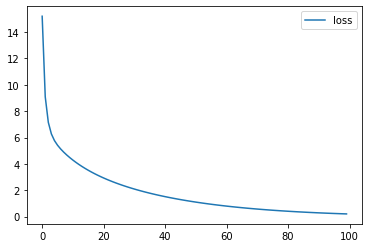

0.20621372759342194


In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_list, label = 'loss')
plt.legend()
plt.show()
print(loss_list[-1])